In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import matplotlib.pyplot as plt
import numpy as np
import superpixel_analysis as sup
import util_plot

from skimage import io

import scipy.io
from scipy.ndimage import center_of_mass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
path = '../../../../../regal/cohen_lab/mxie/data/IVQ29/2017-09-14_IVQ29-S5/slice1/FOV6/Final'

mov = io.imread(path + '/denoised.tif')
noise = np.squeeze(io.imread(path + '/Sn_image.tif'))
bloodmask = np.squeeze(io.imread(path + '/bloodmask.tif'))

mov_nn = mov.copy() * np.repeat(np.expand_dims(bloodmask,2),mov.shape[2],axis=2)
mov = mov * np.repeat(np.expand_dims(noise * bloodmask,2),mov.shape[2],axis=2)

mov.shape

(92, 220, 59970)

In [4]:
# from trefide.preprocess import detrend

# disc_idx = np.array([])
# stim = 10 * np.ones(mov.shape[2]) # simulate stimulation values for in vivo data
# # stim = np.squeeze(io.imread('../Cohen in vivo/data/' + trial + '/stim.tif'))[30:]
    
# # mov_notr, trend, stim, disc_idx = detrend(mov[:,:,:15000], stim, disc_idx.squeeze(), visualize=[10,50], spacing=5000)
# mov, trend, stim, disc_idx = detrend(mov, stim, disc_idx.squeeze(), visualize=[10,50], spacing=5000)

In [5]:
# raw_mov = io.imread(path + '/trimmed.tif').transpose(1,2,0)
# detr = io.imread(path + '/detr.tif')
# detr_nn = io.imread(path + '/detr_nnorm.tif')

## if input is whole data mov

In [6]:
ff_ini = io.imread(path + '/ff.tif')
fb_ini = io.imread(path + '/fb.tif')

fb_ini.shape

(20240, 6)

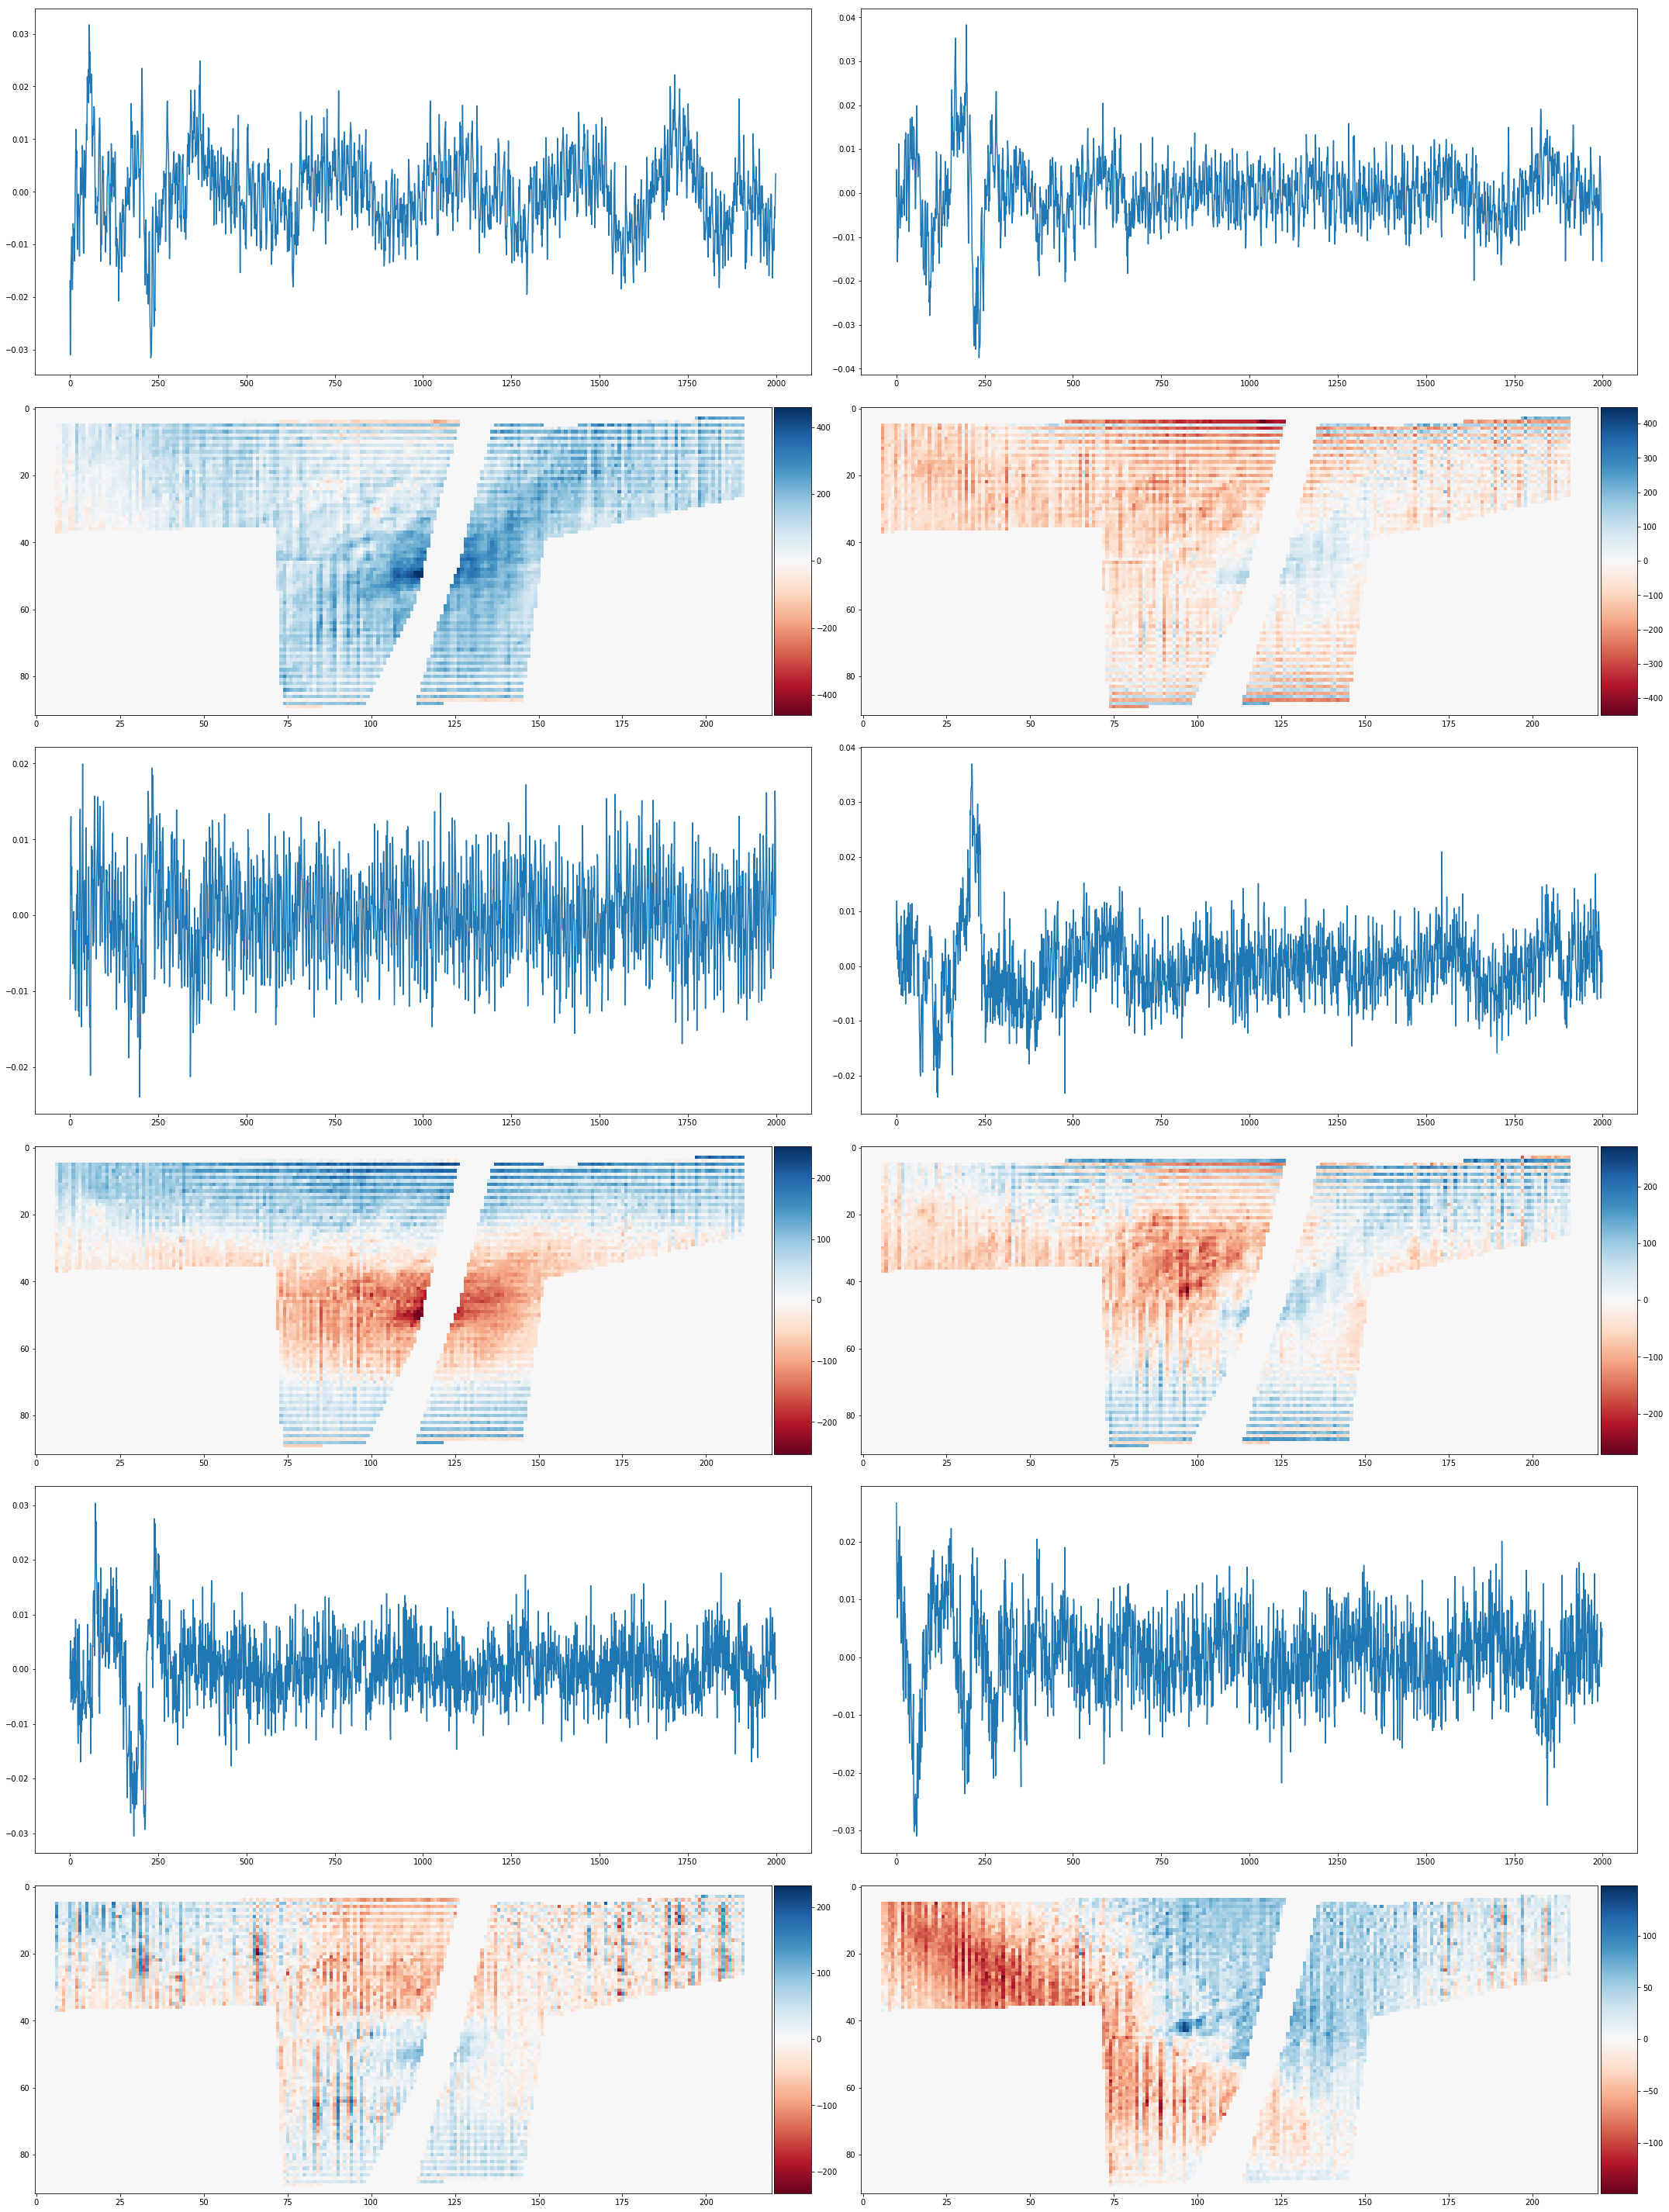

In [7]:
plt.figure(figsize=(30,40))

plt.subplot(6,2,1)
plt.plot(ff_ini[:2000,0])
plt.subplot(6,2,2)
plt.plot(ff_ini[:2000,1])
plt.subplot(6,2,3)
io.imshow(fb_ini[:,0].reshape(mov.shape[1::-1]).transpose(1,0))
plt.subplot(6,2,4)
io.imshow(fb_ini[:,1].reshape(mov.shape[1::-1]).transpose(1,0))

plt.subplot(6,2,5)
plt.plot(ff_ini[:2000,2])
plt.subplot(6,2,6)
plt.plot(ff_ini[:2000,3])
plt.subplot(6,2,7)
io.imshow(fb_ini[:,2].reshape(mov.shape[1::-1]).transpose(1,0))
plt.subplot(6,2,8)
io.imshow(fb_ini[:,3].reshape(mov.shape[1::-1]).transpose(1,0))

plt.subplot(6,2,9)
plt.plot(ff_ini[:2000,4])
plt.subplot(6,2,10)
plt.plot(ff_ini[:2000,5])
plt.subplot(6,2,11)
io.imshow(fb_ini[:,4].reshape(mov.shape[1::-1]).transpose(1,0))
plt.subplot(6,2,12)
io.imshow(fb_ini[:,5].reshape(mov.shape[1::-1]).transpose(1,0))

In [8]:
fb_ini = fb_ini[:,(0,1,2)].reshape(mov.shape[1],mov.shape[0],3).transpose(1,0,2).reshape(mov.shape[0]*mov.shape[1],3)
ff_ini = ff_ini[:,(0,1,2)]

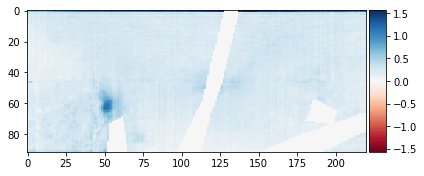

In [9]:
# rlt = np.load('../Cohen in vivo/data/' + trial + '/demixed.npy')

# rlt = rlt.item()
# mov = mov * np.repeat(np.expand_dims(noise,2),mov.shape[2],axis=2)

io.imshow(np.mean(mov,axis=2))
# mov = mov * np.repeat(np.expand_dims(bloodmask,2),mov.shape[2],axis=2)

In [20]:
start = time.time()

rlt=sup.axon_pipeline_Y(mov[:,:,:15000].copy(), fb_ini=fb_ini, ff_ini=ff_ini,
                        cut_off_point = [0.93], length_cut = [100], 
                        bg = 2, patch_size=[60,60], residual_cut = [np.sqrt(1-(0.96)**2)], corr_th_fix=0.5,
                        merge_corr_thr=0.8,
                        sup_only = False, remove=0)

# rlt=sup.axon_pipeline_Y(mov[:,:,:15000].copy(), fb_ini=fb_ini, ff_ini=ff_ini,
#                         cut_off_point = [0.9], length_cut = [100], 
#                         bg = 2, patch_size=[60,60], residual_cut = [np.sqrt(1-(0.96)**2)], corr_th_fix=0.5,
#                         merge_corr_thr=0.8,
#                         sup_only = False, remove=1)

# rlt=sup.axon_pipeline_Y(mov[:,:,:15000].copy(), fb_ini=fb_ini, ff_ini=ff_ini,
#                         cut_off_point = [0.9], length_cut = [100], 
#                         bg = 2, patch_size=[60,60], residual_cut = [np.sqrt(1-(0.96)**2)], corr_th_fix=0.5,
#                         merge_corr_thr=0.8,
#                         sup_only = True, remove=0)

# rlt=sup.axon_pipeline_Y(mov[:,:,:15000].copy(), fb_ini=fb_ini, ff_ini=ff_ini,
#                         cut_off_point = [0.82], length_cut = [100], 
#                         bg = 2, patch_size=[60,60], residual_cut = [np.sqrt(1-(0.96)**2)], corr_th_fix=0.55,
#                         merge_corr_thr=0.8,
#                         sup_only = False, remove=0)

# rlt=sup.axon_pipeline_Y(mov[:,:,:15000].copy(), fb_ini=fb_ini, ff_ini=ff_ini,
#                         cut_off_point = [0.85], length_cut = [100], 
#                         bg = 2, patch_size=[60,60], residual_cut = [np.sqrt(1-(0.96)**2)], corr_th_fix=0.55,
#                         merge_corr_thr=0.8,
#                         sup_only = False, remove=0)

# rlt=sup.axon_pipeline_Y(mov_notr[:,:,10000:15000].copy(), fb_ini=fb_ini, ff_ini=ff_ini[10000:15000,:],
#                         cut_off_point = [0.9], length_cut = [100], 
#                         bg = 2, patch_size=[60,60], residual_cut = [np.sqrt(1-(0.96)**2)], corr_th_fix=0.5,
#                         merge_corr_thr=0.4,
#                         sup_only = False, remove=1)

print("Demixing took: " + str(time.time()-start)+" sec")

start 1 pass!
find superpixels!


/n/home00/mxie/Projects/invivo/demixing/superpixel_analysis.py:263: RuntimeWarning: invalid value encountered in true_divide
  w_mov = (Yt.transpose(2,0,1) - np.mean(Yt, axis=2)) / np.std(Yt, axis=2);


25.75591731071472
rank 1 svd!
46.1916298866272
find pure superpixels!
0.03356218338012695
prepare iteration!
4.06266188621521
24.749535083770752
start 1 pass iteration!
a.shape = (20240, 4); c.shape = (15000, 4)


/n/home00/mxie/Projects/invivo/demixing/superpixel_analysis.py:2278: RuntimeWarning: divide by zero encountered in true_divide
  corr_img_all = vcorrcoef_Y(U/normalize_factor, c);
/n/home00/mxie/Projects/invivo/demixing/superpixel_analysis.py:2278: RuntimeWarning: invalid value encountered in true_divide
  corr_img_all = vcorrcoef_Y(U/normalize_factor, c);


time: 9.759957551956177
time: 9.311733961105347
time: 9.746064186096191


/n/home00/mxie/Projects/invivo/demixing/superpixel_analysis.py:2306: RuntimeWarning: divide by zero encountered in true_divide
  corr_img_all = vcorrcoef_Y(U/normalize_factor, c);
/n/home00/mxie/Projects/invivo/demixing/superpixel_analysis.py:2306: RuntimeWarning: invalid value encountered in true_divide
  corr_img_all = vcorrcoef_Y(U/normalize_factor, c);
/n/home00/mxie/Projects/invivo/demixing/superpixel_analysis.py:2136: RuntimeWarning: invalid value encountered in greater
  cor = csc_matrix((corr_img_all_r>merge_corr_thr)*1);


no merge!
time: 47.076770305633545
time: 10.26056694984436
time: 9.55094313621521
time: 9.319440603256226
no merge!
time: 47.199933767318726
time: 9.89670181274414
time: 10.124341487884521
time: 9.152635097503662
no merge!
time: 47.31498122215271
time: 10.28210973739624
time: 9.144223928451538
time: 9.634718894958496
no merge!
time: 47.004817962646484
time: 10.41016173362732
time: 9.582409143447876
time: 9.393346786499023
no merge!
time: 74.25395131111145
time: 19.529608726501465
time: 19.683536291122437
time: 18.470685958862305
no merge!
time: 95.54418444633484
time: 19.45624828338623
time: 16.349533796310425
time: 9.439953804016113
no merge!
time: 52.08077836036682
time: 12.393599510192871
time: 9.287504434585571
time: 9.108821153640747
no merge!
time: 46.90565776824951
time: 10.580644369125366
time: 9.710477590560913
time: 9.014949321746826
no merge!
time: 46.78623104095459
time: 9.422876119613647
time: 9.912999868392944
time: 8.699315309524536
no merge!
time: 46.981508016586304
tim

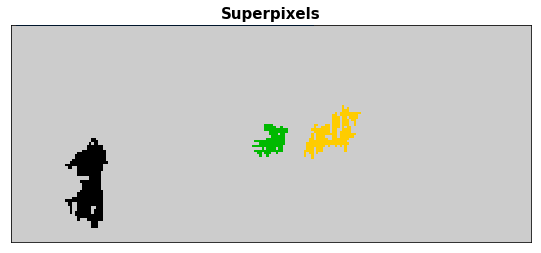

In [21]:
z = sup.superpixel_single_plot(rlt["superpixel_rlt"][0]["connect_mat_1"],
                           np.arange(np.amax(rlt["superpixel_rlt"][0]["connect_mat_1"])-1),
                           rlt["superpixel_rlt"][0]["brightness_rank"],
                           text=False)

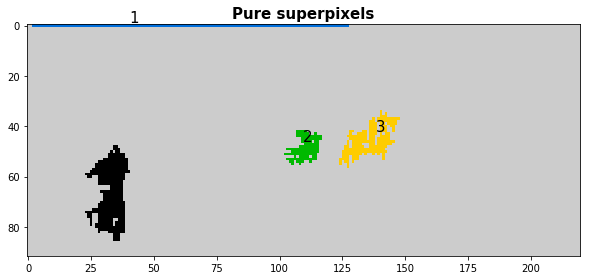

In [22]:
sup.pure_superpixel_single_plot(rlt["superpixel_rlt"][0]["connect_mat_1"],
                                rlt["superpixel_rlt"][0]["pure_pix"],
                                rlt["superpixel_rlt"][0]["brightness_rank"],text=True);

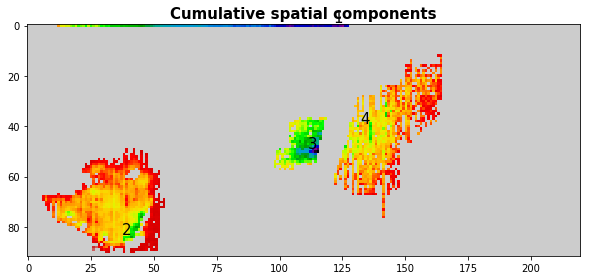

In [23]:
sup.spatial_sum_plot_single((rlt["fin_rlt"]["a"]),mov.shape[:2],text=True);

In [24]:
np.save(path + '/demixed.npy',rlt)

/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


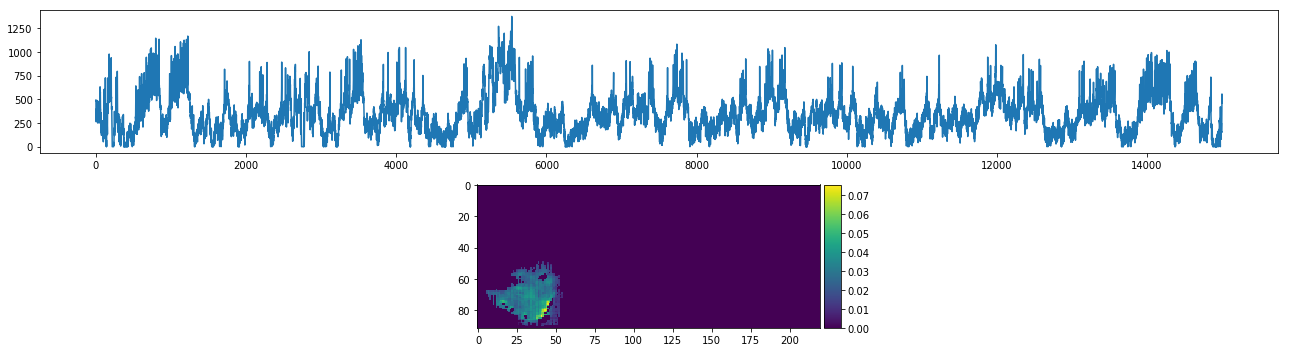

In [26]:
cell_num = 2
plt.figure(figsize=(18,5))
plt.subplot(2,1,1)
plt.plot(rlt["fin_rlt"]["c"][:,cell_num-1])
plt.subplot(2,1,2)
io.imshow(rlt["fin_rlt"]["a"][:,cell_num-1].reshape(mov.shape[1],mov.shape[0]).transpose(1,0))

/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


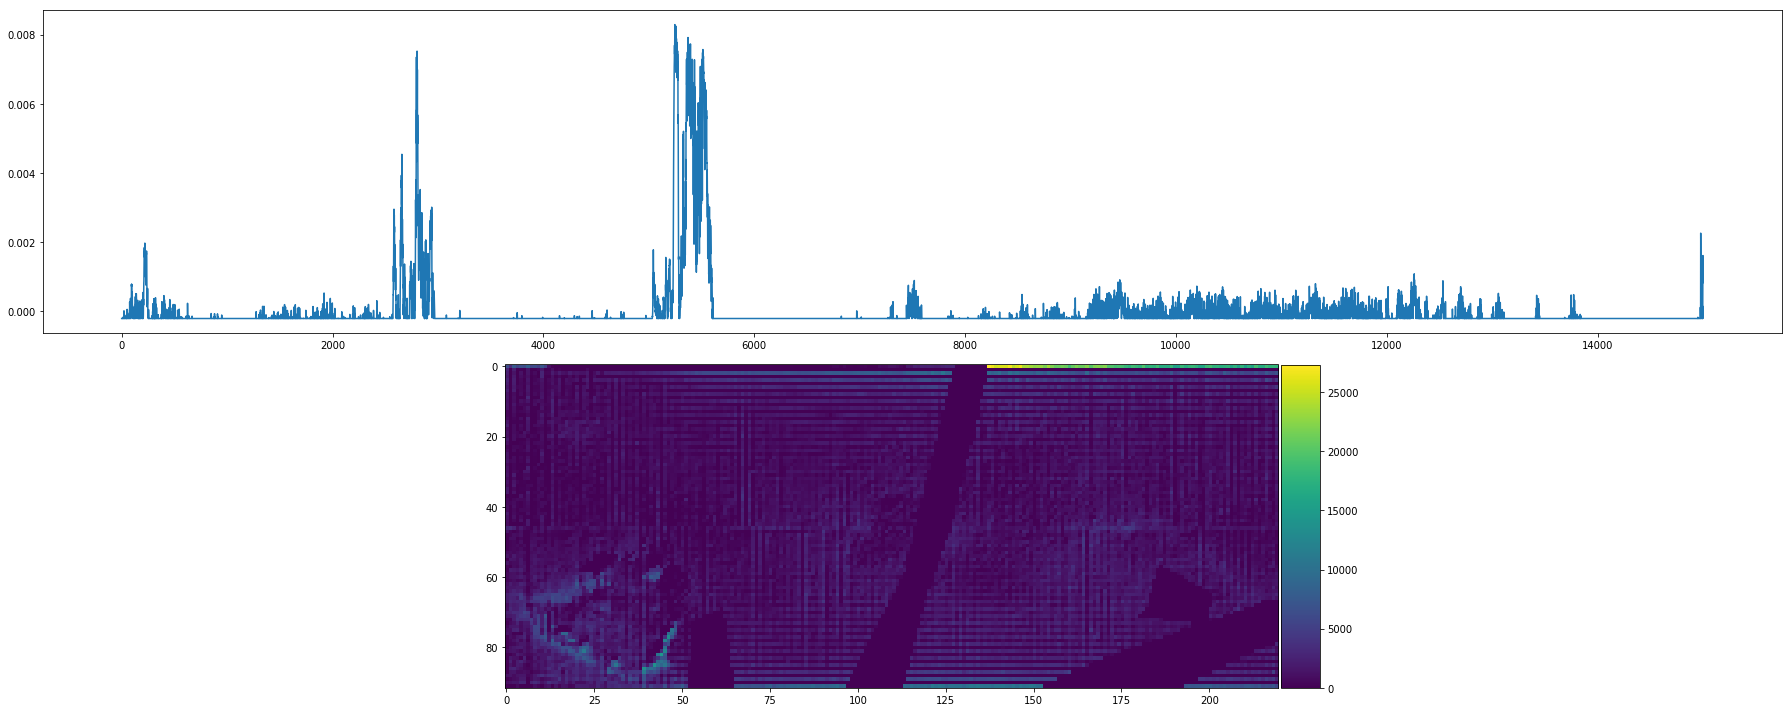

In [27]:
plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.plot(rlt["fin_rlt"]["ff"][:,0])
plt.subplot(2,1,2)
io.imshow(rlt["fin_rlt"]["fb"][:,0].reshape(mov.shape[1::-1]).transpose(1,0))

# Postprocessing Regression Steps

In [29]:
Y = mov.transpose(1,0,2).reshape(mov.shape[0]*mov.shape[1],mov.shape[2])
X = np.hstack((rlt["fin_rlt"]["a"] * rlt["fin_rlt"]["c"][100,:],
               rlt["fin_rlt"]["fb"] * rlt["fin_rlt"]["ff"][100,:]))

In [30]:
nCells = 2

w = np.linalg.lstsq(np.hstack((X[:,:nCells],np.ones(X[:,:1].shape))), X[:,nCells:])[0]
w

/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-1.59645020e-03, -3.92258643e-03, -6.85711717e-03,
         2.49396974e-03,  1.29496236e-01],
       [-1.92070276e-02, -4.71929697e-02,  5.35896810e-03,
        -2.18585563e-02,  2.56328276e+00],
       [ 4.80950487e-02,  1.18172797e-01,  3.37298016e-01,
        -4.06762692e-01,  2.06022183e+00]])

In [31]:
X2 = X.copy()
X2[:,:nCells] = X[:,:nCells] + X[:,:nCells] * np.repeat(np.expand_dims(np.sum(w[:nCells,:],axis=1),axis=1).transpose(1,0),X.shape[0],axis=0)
X2[:,nCells:] = X[:,nCells:] - X[:,:nCells] @ w[:nCells,:]

# xb = X[:,:3] @ w[:3,:];
# cellxb = X[:,:3] * np.repeat(np.expand_dims(np.sum(w[:3,:],axis=1),axis=1).transpose(1,0),X.shape[0],axis=0)

/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


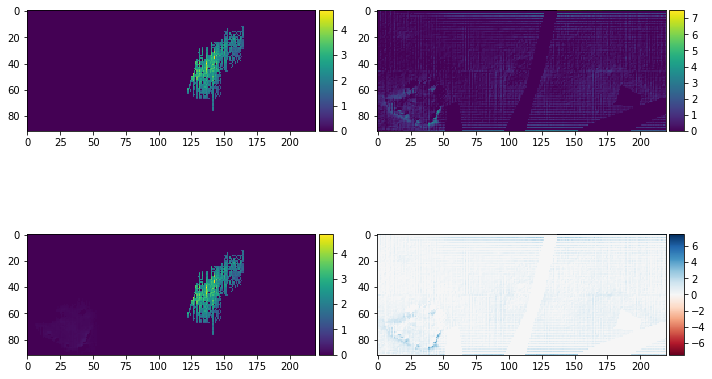

In [32]:
plt.figure(figsize=(10,25))
plt.subplot(8,2,1)
io.imshow(X[:,3].reshape(mov.shape[1::-1]).transpose(1,0))
plt.subplot(8,2,2)
io.imshow(X[:,4].reshape(mov.shape[1::-1]).transpose(1,0))

plt.subplot(8,2,3)
io.imshow(X2[:,3].reshape(mov.shape[1::-1]).transpose(1,0))
plt.subplot(8,2,4)
io.imshow(X2[:,4].reshape(mov.shape[1::-1]).transpose(1,0))

In [33]:
beta_hat2 = np.linalg.lstsq(X2, Y)[0]
res = np.mean(np.square(Y - X2 @ beta_hat2),axis = 0)

/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [327]:
signal2 = X2[:,:nCells] @ beta_hat2[:nCells,:15000]
background2 = X2[:,nCells:] @ beta_hat2[nCells:,:15000]

io.imsave(path + '/signal_15s.tif', signal2)
io.imsave(path + '/background_15s.tif', background2)

In [36]:
io.imsave(path + '/spatial_footprints.tif', X2)
io.imsave(path + '/cell_spatial_footprints.tif', X2[:,(1)])
io.imsave(path + '/temporal_traces.tif', beta_hat2)
io.imsave(path + '/cell_traces.tif', beta_hat2[(1),:])
io.imsave(path + '/residual_var.tif', res)
io.imsave(path + '/cell_locations.tif',np.vstack((center_of_mass(X2[:,1].reshape(mov.shape[1::-1]).transpose(1,0))
                                                 )
                                                ))
# io.imsave(path + '/cell_demixing_matrix.tif', np.linalg.inv(np.array(X2[:,(0,2)].T @ X2[:,(0,2)])) @ X2[:,(0,2)].T)

In [5]:
X2 = io.imread(path + '/spatial_footprints.tif')
# beta_hat2 = io.imread(path + '/temporal_traces.tif')

In [4]:
trend = raw_mov[:,:,:] - detr[:,:,:]
del raw_mov
del detr
mov = np.add(mov,trend)

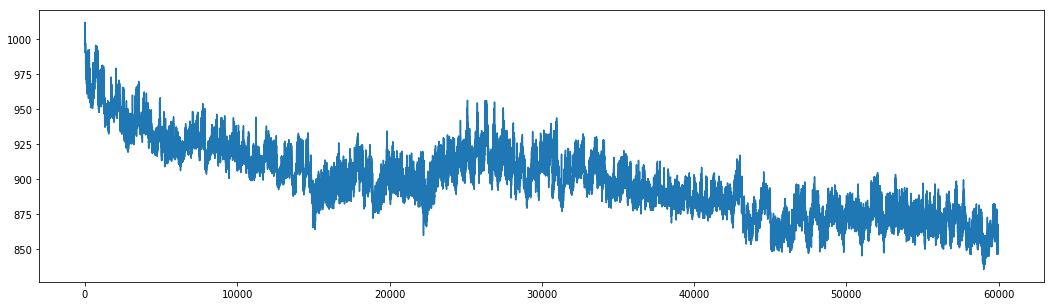

In [9]:
plt.figure(figsize=(18,5))
plt.plot(mov[70,40,:])

# Visualizations

/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


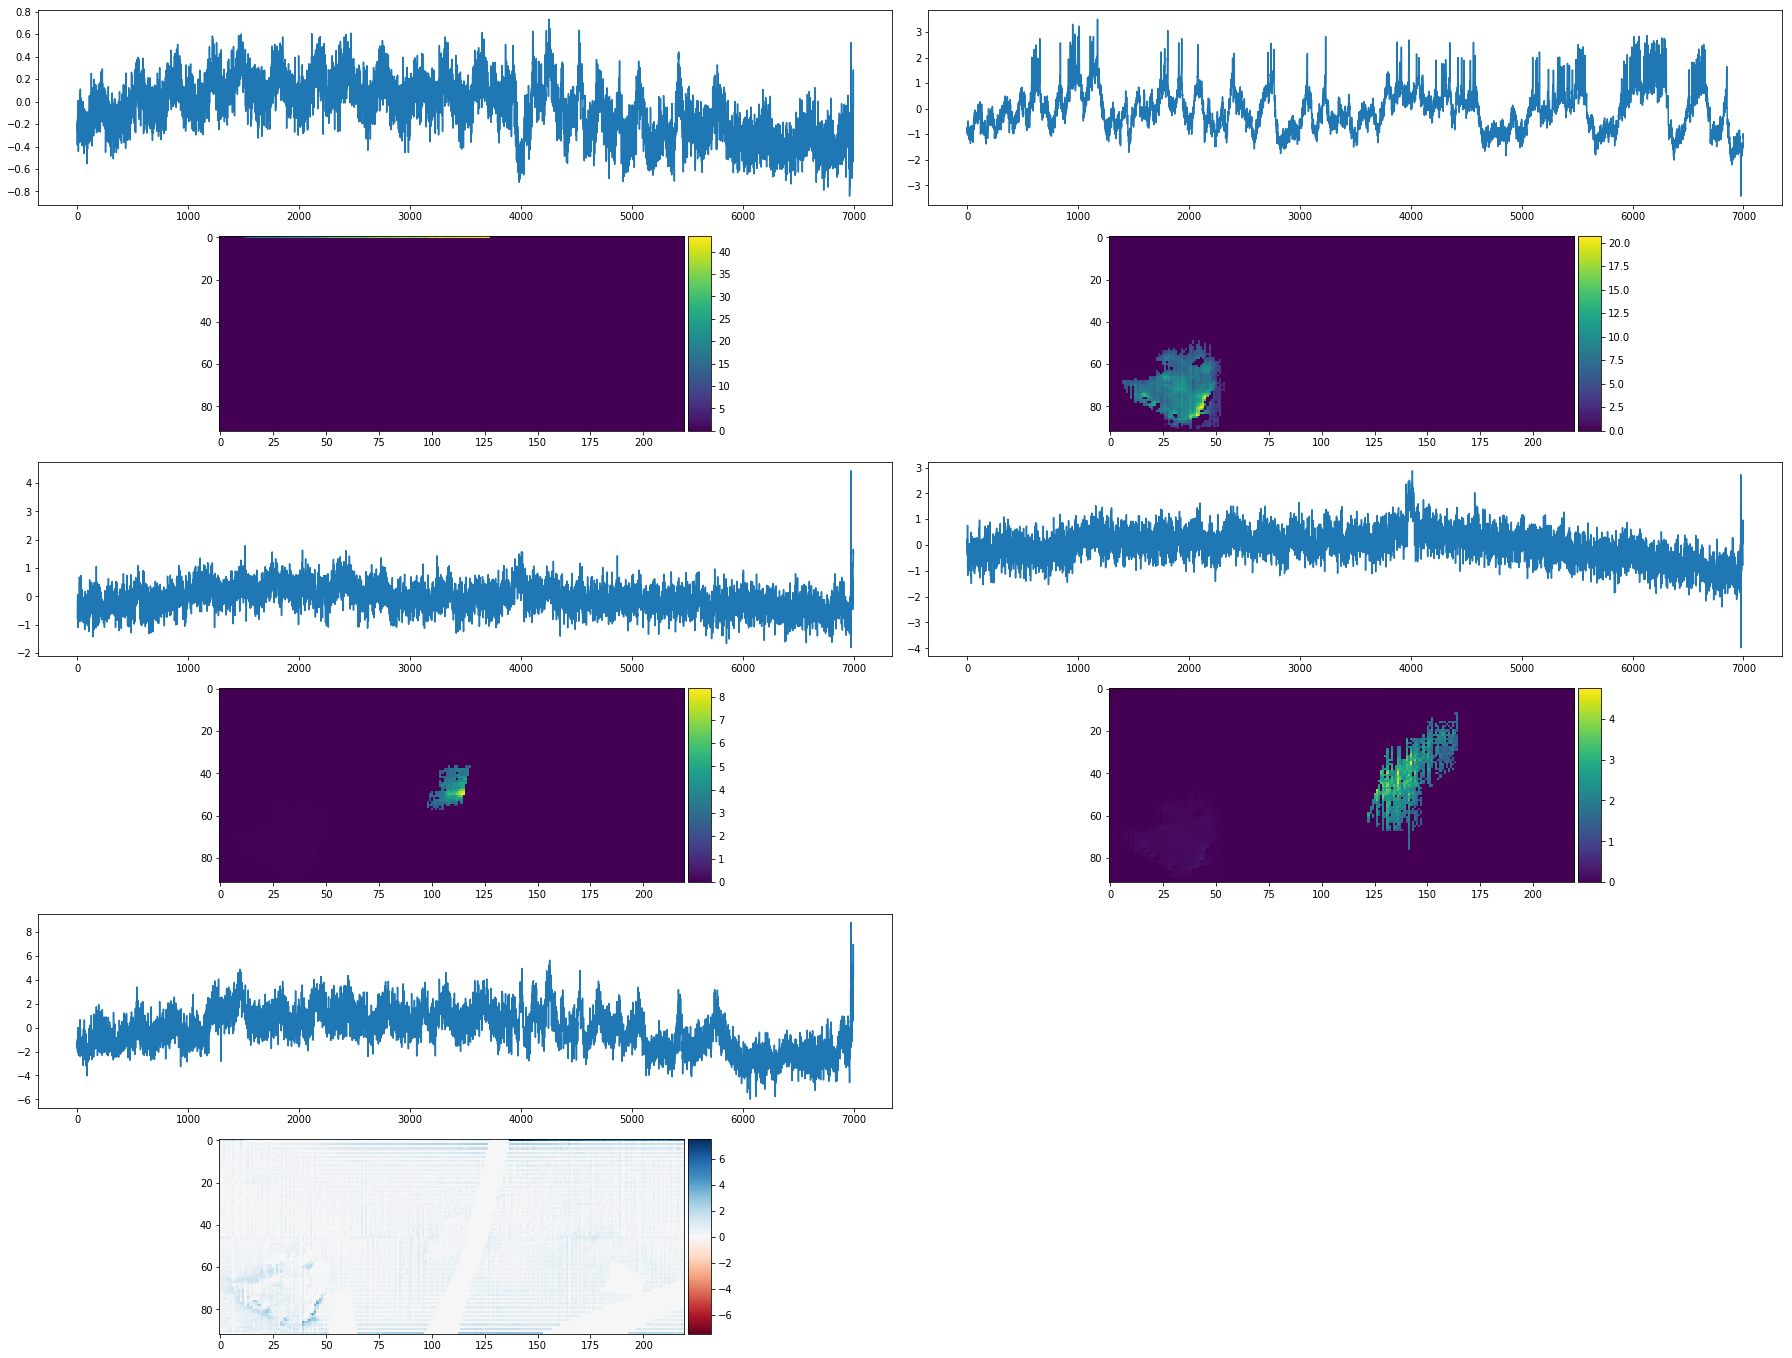

In [35]:
plt.figure(figsize=(25,25))

plt.subplot(8,2,1)
plt.plot(beta_hat2[0,8000:15000])
plt.subplot(8,2,2)
plt.plot(beta_hat2[1,8000:15000])

plt.subplot(8,2,3)
io.imshow(X2[:,0].reshape(mov.shape[1::-1]).transpose(1,0))
plt.subplot(8,2,4)
io.imshow(X2[:,1].reshape(mov.shape[1::-1]).transpose(1,0))


plt.subplot(8,2,5)
plt.plot(beta_hat2[2,8000:15000])
plt.subplot(8,2,6)
plt.plot(beta_hat2[3,8000:15000])

plt.subplot(8,2,7)
io.imshow(X2[:,2].reshape(mov.shape[1::-1]).transpose(1,0))
plt.subplot(8,2,8)
io.imshow(X2[:,3].reshape(mov.shape[1::-1]).transpose(1,0))

plt.subplot(8,2,9)
plt.plot(beta_hat2[4,8000:15000])
# plt.subplot(8,2,10)
# plt.plot(beta_hat2[5,:])

plt.subplot(8,2,11)
io.imshow(X2[:,4].reshape(mov.shape[1::-1]).transpose(1,0))
# plt.subplot(8,2,12)
# io.imshow(X2[:,5].reshape(mov.shape[1::-1]).transpose(1,0))


# plt.subplot(8,2,13)
# plt.plot(beta_hat2[6,:])

# plt.subplot(8,2,15)
# io.imshow(X2[:,6].reshape(mov.shape[1::-1]).transpose(1,0))


In [ ]:
## plt.figure(figsize=(25,7))

plt.subplot(2,2,1)
plt.plot(beta_hat[3, :])
plt.subplot(2,2,2)
plt.plot(beta_hat[4, :])

plt.subplot(2,2,3)
io.imshow(X[:,0].reshape(76,116).transpose(1,0))
plt.subplot(2,2,4)
io.imshow(X[:,1].reshape(76,116).transpose(1,0))

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(2,1,1)
plt.plot(beta_hat[2,1000:2000])
plt.subplot(2,1,2)
io.imshow(X[:,2].reshape(116,76).transpose(1,0))

In [ ]:
plt.figure(figsize=(18,10))
# plt.subplot(3,1,1)
# # plt.plot(rlt["fin_rlt"]["ff"][7500:8500,1])
# plt.plot(np.arange(7500,8500),beta_hat[6, 7500:8500])
# plt.subplot(3,1,2)
# plt.plot(np.arange(7500,8500),beta_hat[3, 7500:8500])
# plt.subplot(3,1,3)
io.imshow(rlt["fin_rlt"]["fb"][:,1].reshape(270,84).transpose(1,0))


In [ ]:
plt.figure(figsize=(18,5))
plt.plot(beta_hat[6,:])

In [ ]:
plt.figure(figsize=(18,30))
plt.subplot(9,1,1)
plt.plot(beta_hat[0,8000:9000])
plt.subplot(9,1,2)
plt.plot(beta_hat[1,8000:9000])
plt.subplot(9,1,3)
plt.plot(beta_hat[2,8000:9000])
plt.subplot(9,1,4)
plt.plot(beta_hat[3,8000:9000])
plt.subplot(9,1,5)
plt.plot(beta_hat[4,8000:9000])
plt.subplot(9,1,6)
plt.plot(beta_hat[5,8000:9000])
plt.subplot(9,1,7)
plt.plot(beta_hat[6,8000:9000])
plt.subplot(9,1,8)
plt.title('Background')
plt.plot(beta_hat[7,8000:9000])
plt.subplot(9,1,9)
plt.plot(beta_hat[8,8000:9000])